In [10]:
import pandas as pd
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import Normalizer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import recall_score, make_scorer, f1_score

#Carregando o DataSet e removendo a primeira coluna 
data = pd.read_csv("data.csv")
data = data.iloc[:, 1 :]


In [ ]:
data = data.sort_values("target").iloc[-800:]
pd.DataFrame(data.iloc[:, 12:])

        col_12    col_13    col_14  target
3501  1.940201  3.593715  3.892735       0
3502  2.263092  3.978941  5.001907       0
3503  2.359612  2.847351  4.556371       0
3504  1.813626  2.781324  5.925271       0
3505  2.942607  3.378112  4.442734       0
...        ...       ...       ...     ...
3234  1.894105  2.599733  4.209581       1
2531  3.168759  2.533583  5.721238       1
3885  3.250885  2.605461  5.673382       1
3154  3.444297  3.533187  3.927719       1
4195  2.393963  2.750069  4.265303       1

[800 rows x 4 columns]


In [21]:
data["target"].value_counts()

target
0    484
1    316
Name: count, dtype: int64

In [26]:
X = data.iloc[:, 0 :15]
y = data.iloc[:, -1:]
print(X.iloc[:, -1:], y)


        col_14
3501  3.892735
3502  5.001907
3503  4.556371
3504  5.925271
3505  4.442734
...        ...
3234  4.209581
2531  5.721238
3885  5.673382
3154  3.927719
4195  4.265303

[800 rows x 1 columns]       target
3501       0
3502       0
3503       0
3504       0
3505       0
...      ...
3234       1
2531       1
3885       1
3154       1
4195       1

[800 rows x 1 columns]


In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state=1, shuffle=True)

In [28]:

grid = GridSearchCV(
             estimator=MLPClassifier(),
             param_grid={
                "hidden_layer_sizes" : [
                    (100),
                    (100, 100),
                    (100, 100, 100, 100),
                    (50, 50, 50, 50),
                ],
                "activation": ['relu', 'identity', 'logistic', 'tanh'],
                "learning_rate_init":[0.004, 0.01, 0.0001, 0.005],

             },
             cv=4,
             scoring={
                 "precision" : make_scorer(precision_score),
                 "recall" : make_scorer(recall_score),
                 "f1" : make_scorer(f1_score),
             },
             return_train_score=True,
             refit='f1',
            )

In [9]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [31]:
grid.fit(Xtrain, Ytrain)

c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin\AppData\Local\Programs\Python\Pyth

GridSearchCV(cv=4, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [100, (100, 100),
                                                (100, 100, 100, 100),
                                                (50, 50, 50, 50)],
                         'learning_rate_init': [0.004, 0.01, 0.0001, 0.005]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [30]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_precision,split1_test_precision,...,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,mean_train_f1,std_train_f1
0,0.064457,0.029779,0.008795,0.000859,relu,100,0.0040,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.488372,1.000000,...,0.423529,0.389543,0.195907,48,0.546713,0.167488,0.606860,0.453441,0.443625,0.168539
1,0.051635,0.014855,0.008326,0.000842,relu,100,0.0100,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.800000,1.000000,...,0.375000,0.394336,0.116031,45,0.333333,0.414938,0.586319,0.331878,0.416617,0.103584
2,0.147289,0.005226,0.008178,0.000674,relu,100,0.0001,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.512195,0.545455,...,0.390805,0.407283,0.027567,44,0.513514,0.441176,0.442029,0.444444,0.460291,0.030751
3,0.051244,0.016398,0.007635,0.000368,relu,100,0.0050,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.809524,0.875000,...,0.341463,0.380017,0.132732,51,0.395062,0.275229,0.586420,0.408333,0.416261,0.111081
4,0.211557,0.046375,0.007360,0.000469,relu,"(100, 100)",0.0040,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.545455,0.636364,...,0.449438,0.452338,0.073487,25,0.625806,0.505747,0.616949,0.546816,0.573830,0.049814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.366024,0.061508,0.007755,0.000417,tanh,"(100, 100, 100, 100)",0.0050,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.594595,0.675000,...,0.400000,0.458464,0.046504,24,0.551971,0.622517,0.486111,0.471545,0.533036,0.059892
60,0.139556,0.032159,0.007652,0.000338,tanh,"(50, 50, 50, 50)",0.0040,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.631579,0.474359,...,0.485981,0.487275,0.026605,11,0.625430,0.783019,0.629870,0.677215,0.678883,0.063456
61,0.083679,0.022918,0.007783,0.000327,tanh,"(50, 50, 50, 50)",0.0100,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.468750,0.692308,...,0.032258,0.267359,0.160084,57,0.569892,0.369099,0.355932,0.158416,0.363335,0.145556
62,0.392265,0.006240,0.007925,0.000333,tanh,"(50, 50, 50, 50)",0.0001,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.567568,0.638889,...,0.524272,0.483047,0.039749,13,0.537415,0.501718,0.501845,0.586751,0.531932,0.034833


In [33]:
results = grid.predict(Xtest)

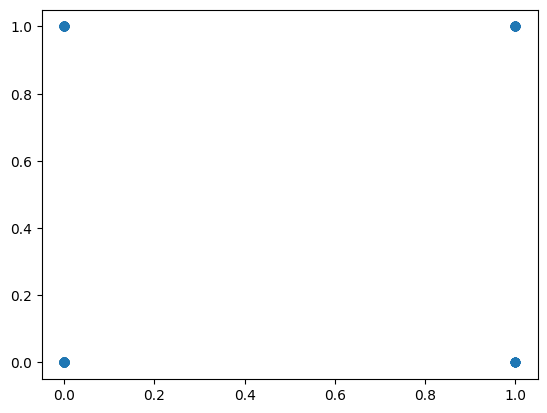

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x=results, y=Ytest)
# plt.hist(results)

In [35]:
confusion_matrix(Ytest, results)

array([[80, 11],
       [41, 28]])

(array([121.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  39.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

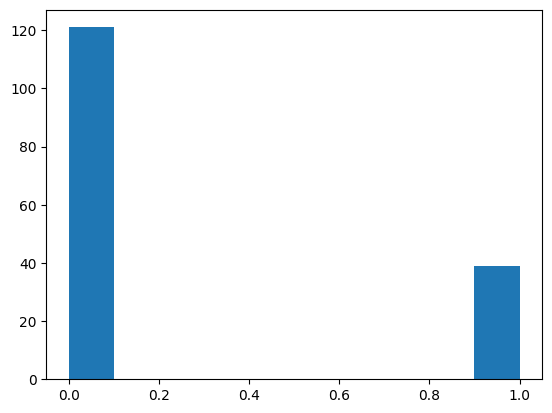

In [36]:
plt.hist(results)
